In [167]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [168]:
%matplotlib inline

In [169]:
show_animation = True
plt.style.use('bmh')

## Prepare for GD 1D

In [170]:
def grad(x):
    return 2*x+ 5*np.cos(x)

In [171]:
def cost(x):
    return x**2 + 5*np.sin(x)

In [172]:
def myGD1(eta=0.1, x0=-5, iter=100):
    px = x0
    fig, ax = None, None
    if show_animation:
        fig, ax = plt.subplots()

        # x = np.linspace(-10, 10, 100)

        # # Plot the function
        # f = plt.plot(x, cost(x), color = 'b', label = 'f(x)')
        # plt.title("$f(x)=x^2+5sin(x)$; $x_0=-5$; $\eta=0.001$")

    for it in range(iter):
        old_px = px
        py = cost(px)

        slope = grad(px)
        
        px = px - eta*slope
        if abs(grad(px)) < 1e-3:
            break
        
        step = abs(old_px - px)

        if show_animation:
            # plt.cla()

            # Define the range of x values to plot
            x = np.linspace(-10, 10, 100)

            # Plot the function
            plt.plot(x, cost(x), color = 'b', label = 'f(x)')
            plt.title("$f(x)=x^2+5sin(x)$; $x_0=-10$; $\eta=0.1$")

            plt.scatter(old_px, py, color = 'r', s=20)

            # Plot the tangent line
            y_intercept = py - slope * old_px
            tx = np.arange(old_px - 1, old_px + 2, 2) # X coordinates of tangent line
            ty = slope * tx + y_intercept # Y coordinates of tangent line
            plt.plot(tx, ty, 'r--',label = 'df(x)')

            # Plot text info
            bbox_args = dict(boxstyle="round", fc="0.8")
            arrow_args = dict(arrowstyle = '->', color = 'b', linewidth = 1)
            text = f'Iteration: {it}\nPoint: ({px:.2f}, {py:.2f})\nSlope: {slope:.2f}\nStep: {step:.4f}'
            text = plt.annotate(text, xy = (px, py), xytext = (0.7, 0.9), textcoords = 'axes fraction', bbox = bbox_args, arrowprops=arrow_args, fontsize = 7)

            plt.legend()

            clear_output(wait = True)
            plt.pause(0.01)

    if show_animation:
        plt.pause(0.01)
        plt.show()

Main

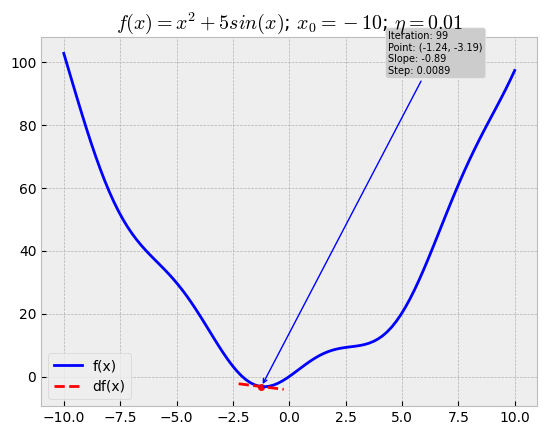

In [173]:
myGD1(eta=0.1, x0=-10, iter=500)

## Prepare for GD multiple-D

In [174]:
np.random.seed(2)

Solution found by formula: w =  [[4.0071715  2.98225924]]


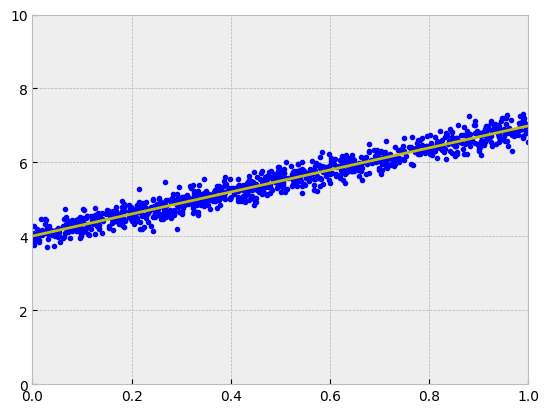

In [175]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

In [176]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

In [177]:
def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2

In [178]:
def myGD(w_init, cost, grad, eta):
    w = [w_init]
    c = [cost(w_init)]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        c.append(cost(w_new))
    return (w, it, c)

In [179]:
w_init = np.array([[2, 1]]).T
(w1, it1, c1) = myGD(w_init, cost, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations and get %.4f cost' %(it1+1, c1[-1]))

Solution found by GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations and get 0.0189 cost


Visualization

In [180]:
from matplotlib import cm

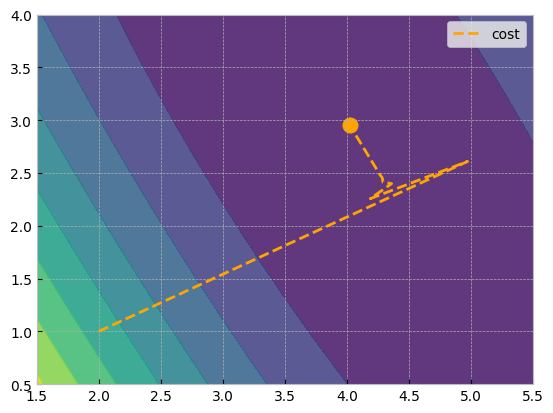

In [181]:
w1 = np.array(w1).reshape(-1,2)

xD = np.linspace(1.5, 5.5, 100) 
yD = np.linspace(0.5, 4.0, 100)
[X, Y] = np.meshgrid(xD,yD)

fig, ax = plt.subplots()

zs2 = np.array([cost(np.array([[w1_, w2_]]).T) for w1_, w2_ in zip(np.ravel(X), np.ravel(Y))])
Z = zs2.reshape(X.shape)

for i,w in enumerate(w1):
    w = np.ravel(w)

    # plots contour lines
    cp = ax.contour(X, Y, Z)
    
    ax.set_title('Contour Plot')
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')

    plt.clabel(cp, inline=1,fmt='%1.1f', fontsize=15 )
    cp = plt.contourf(X, Y, Z, alpha=0.85,cmap=cm.viridis)
    
    plt.scatter(w[0],w[1],marker='o', s=11**2, color='orange' ) 
    plt.plot(w1[:i,0],w1[:i,1], linestyle="dashed", color='orange', label='cost') # plot trajectory
    # plt.tight_layout()

    plt.legend()
    clear_output(wait = True)
    plt.pause(0.01)

    # plt.show()